In [2]:
# 경고 메세지 무시
import os
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

# 한글 안 깨지게 하기
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})


# csv 파일 가져오기
df = pd.read_csv('C:/Users/user/Desktop/머신러닝 학습소/1102contest/eunpyeong.csv', encoding='cp949')

In [5]:
# 필요한 기능들
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib import rc

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   시군구                         11 non-null     object 
 1   읍면동                         11 non-null     object 
 2   거주등록인구수                     11 non-null     int64  
 3   공원개수                        11 non-null     int64  
 4   공원면적                        11 non-null     int64  
 5   1인당공원면적                     11 non-null     float64
 6   녹지개수                        11 non-null     int64  
 7   녹지면적                        11 non-null     int64  
 8   1인당녹지면적                     11 non-null     float64
 9   녹지공원총합                      11 non-null     int64  
 10  녹지공원면적총합                    11 non-null     int64  
 11  1인당녹지공원면적총합                 11 non-null     float64
 12  도시재생사업개수                    11 non-null     int64  
 13  버스정류장개수                     11 non-nu

In [7]:
df.corr()

,거주등록인구수,공원개수,공원면적,1인당공원면적,녹지개수,녹지면적,1인당녹지면적,녹지공원총합,녹지공원면적총합,1인당녹지공원면적총합,도시재생사업개수,버스정류장개수,지하철역개수,토지공시지가평균,기초수급자인구밀도 (인원 수 / 면적 (k㎡)),저소득층가구비율,주간평균생활인구수,미세먼지농도
거주등록인구수,1.000000,0.737899,0.374500,0.307072,0.341433,0.146781,-0.268420,0.630511,0.368772,0.289102,0.167718,0.904047,0.150538,-0.298376,0.721050,0.870035,0.867742,NaN
공원개수,0.737899,1.000000,0.819997,0.787294,0.623604,0.673550,0.280048,0.930077,0.817687,0.779668,0.494418,0.700061,0.206486,-0.691681,0.167202,0.796325,0.601372,NaN
공원면적,0.374500,0.819997,1.000000,0.996631,0.603954,0.915993,0.559506,0.806176,0.999932,0.995117,0.610461,0.447807,0.032664,-0.860000,-0.259487,0.605344,0.332434,NaN
1인당공원면적,0.307072,0.787294,0.996631,1.000000,0.571469,0.924657,0.586614,0.770078,0.996904,0.999483,0.617885,0.392117,0.038783,-0.873608,-0.325920,0.553829,0.264890,NaN
녹지개수,0.341433,0.623604,0.603954,0.571469,1.000000,0.693343,0.668233,0.867184,0.607984,0.584397,0.281867,0.281059,-0.093302,-0.377303,-0.009791,0.282357,0.463493,NaN
녹지면적,0.146781,0.673550,0.915993,0.924657,0.693343,1.000000,0.827014,0.754893,0.920607,0.935480,0.578090,0.224287,-0.123175,-0.774684,-0.357449,0.365478,0.088094,NaN
1인당녹지면적,-0.268420,0.280048,0.559506,0.586614,0.668233,0.827014,1.000000,0.492422,0.568607,0.612355,0.318046,-0.198457,-0.119347,-0.455497,-0.521287,-0.146580,-0.260958,NaN
녹지공원총합,0.630511,0.930077,0.806176,0.770078,0.867184,0.754893,0.492422,1.000000,0.806599,0.771295,0.447415,0.578035,0.087691,-0.617925,0.101910,0.639968,0.600899,NaN
녹지공원면적총합,0.368772,0.817687,0.999932,0.996904,0.607984,0.920607,0.568607,0.806599,1.000000,0.995746,0.610969,0.442375,0.028213,-0.859562,-0.262949,0.599811,0.326123,NaN
1인당녹지공원면적총합,0.289102,0.779668,0.995117,0.999483,0.584397,0.935480,0.612355,0.771295,0.995746,1.000000,0.615802,0.374900,0.033121,-0.870894,-0.338859,0.534822,0.248221,NaN


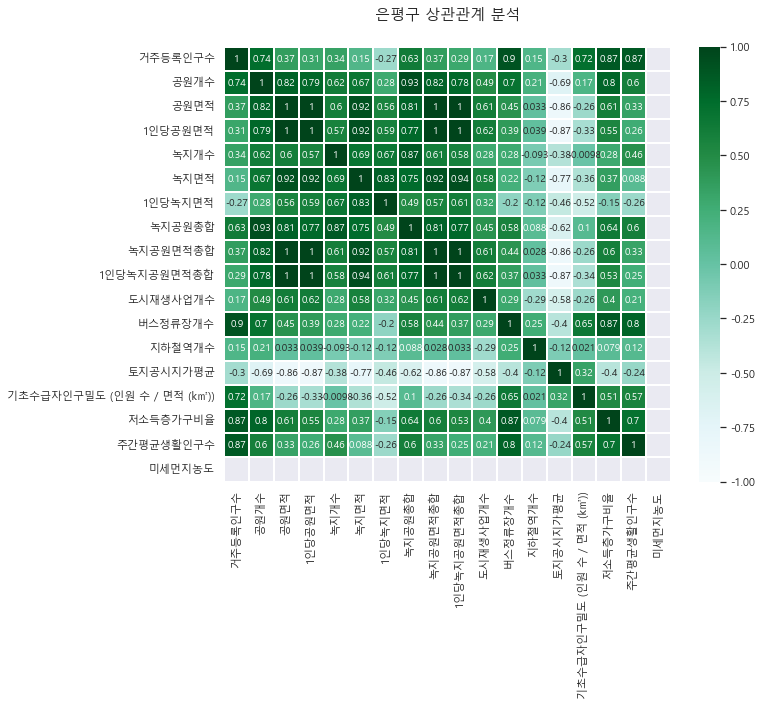

In [20]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("은평구 상관관계 분석", y = 1.05, size = 15)
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='BuGn')
plt.show()